In [1]:
import math
import numpy as np
import random as rd
import pandas as pd
import seaborn as sns

In [38]:
# 연습문제
titanic = sns.load_dataset('titanic')
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [39]:
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [40]:
titanic.age.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

In [49]:
titanic.dropna(subset=['age'], inplace=True)
pd.set_option('display.max_rows', None) # 모든 행 출력
pd.set_option('display.max_columns', None) # 모든 열 출력
titanic

survived  pclass     sex    age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.00      1      0    7.2500        S   Third   
1           1       1  female  38.00      1      0   71.2833        C   First   
2           1       3  female  26.00      0      0    7.9250        S   Third   
3           1       1  female  35.00      1      0   53.1000        S   First   
4           0       3    male  35.00      0      0    8.0500        S   Third   
6           0       1    male  54.00      0      0   51.8625        S   First   
7           0       3    male   2.00      3      1   21.0750        S   Third   
8           1       3  female  27.00      0      2   11.1333        S   Third   
9           1       2  female  14.00      1      0   30.0708        C  Second   
10          1       3  female   4.00      1      1   16.7000        S   Third   
11          1       1  female  58.00      0      0   26.5500        S   First   
12          0       3    male  20.00      0      0    8.0500        S   Third   
13          0       3    male  39.00      1      5   31.2750        S   Third   
14          0       3  female  14.00      0      0    7.8542        S   Third   
15          1       2  female  55.00      0      0   16.0000        S  Second   
16          0       3    male   2.00      4      1   29.1250        Q   Third   
18          0       3  female  31.00      1      0   18.0000        S   Third   
20          0       2    male  35.00      0      0   26.0000        S  Second   
21          1       2    male  34.00      0      0   13.0000        S  Second   
22          1       3  female  15.00      0      0    8.0292        Q   Third   
23          1       1    male  28.00      0      0   35.5000        S   First   
24          0       3  female   8.00      3      1   21.0750        S   Third   
25          1       3  female  38.00      1      5   31.3875        S   Third   
27          0       1    male  19.00      3      2  263.0000        S   First   
30          0       1    male  40.00      0      0   27.7208        C   First   
33          0       2    male  66.00      0      0   10.5000        S  Second   
34          0       1    male  28.00      1      0   82.1708        C   First   
35          0       1    male  42.00      1      0   52.0000        S   First   
37          0       3    male  21.00      0      0    8.0500        S   Third   
38          0       3  female  18.00      2      0   18.0000        S   Third   
39          1       3  female  14.00      1      0   11.2417        C   Third   
40          0       3  female  40.00      1      0    9.4750        S   Third   
41          0       2  female  27.00      1      0   21.0000        S  Second   
43          1       2  female   3.00      1      2   41.5792        C  Second   
44          1       3  female  19.00      0      0    7.8792        Q   Third   
49          0       3  female  18.00      1      0   17.8000        S   Third   
50          0       3    male   7.00      4      1   39.6875        S   Third   
51          0       3    male  21.00      0      0    7.8000        S   Third   
52          1       1  female  49.00      1      0   76.7292        C   First   
53          1       2  female  29.00      1      0   26.0000        S  Second   
54          0       1    male  65.00      0      1   61.9792        C   First   
56          1       2  female  21.00      0      0   10.5000        S  Second   
57          0       3    male  28.50      0      0    7.2292        C   Third   
58          1       2  female   5.00      1      2   27.7500        S  Second   
59          0       3    male  11.00      5      2   46.9000        S   Third   
60          0       3    male  22.00      0      0    7.2292        C   Third   
61          1       1  female  38.00      0      0   80.0000      NaN   First   
62          0       1    male  45.00      1      0   83.4750        S   First   
63          0       3    male   4.00

In [57]:
print(titanic.columns)
titanic['adult_female columns'] = titanic.apply(lambda x: True if x.age >= 20 and x.sex == 'female' else False, axis=1) # axis =0 으로 하면 열방향적용이라 series가 되버려서 실행이 안됨!
titanic

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


survived  pclass     sex    age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.00      1      0    7.2500        S   Third   
1           1       1  female  38.00      1      0   71.2833        C   First   
2           1       3  female  26.00      0      0    7.9250        S   Third   
3           1       1  female  35.00      1      0   53.1000        S   First   
4           0       3    male  35.00      0      0    8.0500        S   Third   
6           0       1    male  54.00      0      0   51.8625        S   First   
7           0       3    male   2.00      3      1   21.0750        S   Third   
8           1       3  female  27.00      0      2   11.1333        S   Third   
9           1       2  female  14.00      1      0   30.0708        C  Second   
10          1       3  female   4.00      1      1   16.7000        S   Third   
11          1       1  female  58.00      0      0   26.5500        S   First   
12          0       3    male  20.00      0      0    8.0500        S   Third   
13          0       3    male  39.00      1      5   31.2750        S   Third   
14          0       3  female  14.00      0      0    7.8542        S   Third   
15          1       2  female  55.00      0      0   16.0000        S  Second   
16          0       3    male   2.00      4      1   29.1250        Q   Third   
18          0       3  female  31.00      1      0   18.0000        S   Third   
20          0       2    male  35.00      0      0   26.0000        S  Second   
21          1       2    male  34.00      0      0   13.0000        S  Second   
22          1       3  female  15.00      0      0    8.0292        Q   Third   
23          1       1    male  28.00      0      0   35.5000        S   First   
24          0       3  female   8.00      3      1   21.0750        S   Third   
25          1       3  female  38.00      1      5   31.3875        S   Third   
27          0       1    male  19.00      3      2  263.0000        S   First   
30          0       1    male  40.00      0      0   27.7208        C   First   
33          0       2    male  66.00      0      0   10.5000        S  Second   
34          0       1    male  28.00      1      0   82.1708        C   First   
35          0       1    male  42.00      1      0   52.0000        S   First   
37          0       3    male  21.00      0      0    8.0500        S   Third   
38          0       3  female  18.00      2      0   18.0000        S   Third   
39          1       3  female  14.00      1      0   11.2417        C   Third   
40          0       3  female  40.00      1      0    9.4750        S   Third   
41          0       2  female  27.00      1      0   21.0000        S  Second   
43          1       2  female   3.00      1      2   41.5792        C  Second   
44          1       3  female  19.00      0      0    7.8792        Q   Third   
49          0       3  female  18.00      1      0   17.8000        S   Third   
50          0       3    male   7.00      4      1   39.6875        S   Third   
51          0       3    male  21.00      0      0    7.8000        S   Third   
52          1       1  female  49.00      1      0   76.7292        C   First   
53          1       2  female  29.00      1      0   26.0000        S  Second   
54          0       1    male  65.00      0      1   61.9792        C   First   
56          1       2  female  21.00      0      0   10.5000        S  Second   
57          0       3    male  28.50      0      0    7.2292        C   Third   
58          1       2  female   5.00      1      2   27.7500        S  Second   
59          0       3    male  11.00      5      2   46.9000        S   Third   
60          0       3    male  22.00      0      0    7.2292        C   Third   
61          1       1  female  38.00      0      0   80.0000      NaN   First   
62          0       1    male  45.00      1      0   83.4750        S   First   
63          0       3    male   4.00

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [75]:
#font_list = matplotlib.font_manager.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally

mpl.rcParams['font.family'] = 'Black And White Picture'
print(mpl.rcParams['font.family'])

Black And White Picture
Noto Serif Ahom
['Black And White Picture']


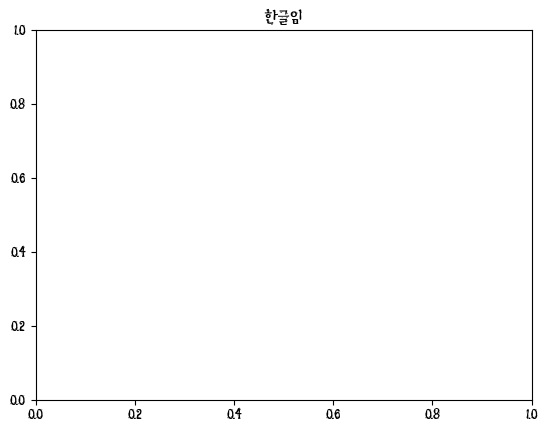

In [76]:
plt.title('한글임')
plt.show()

In [77]:
mpl.rc('axes',unicode_minus = False)

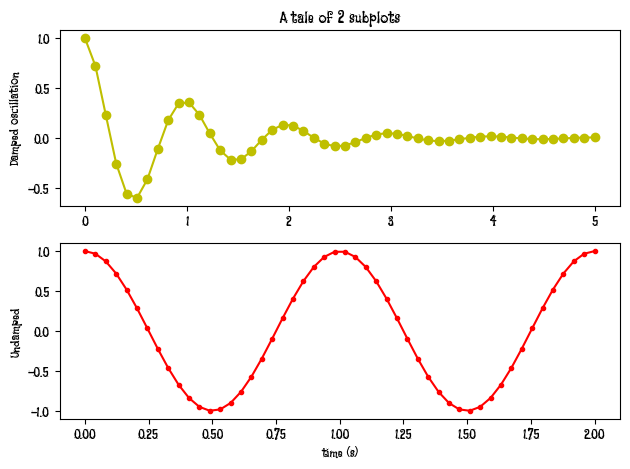

In [83]:
# tight_layout()명령을 실행하면 플롯 간의 간격을 자동으로 맞춰줍니다.
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2*np.pi *x1)*np.exp(-x1)
y2 = np.cos(2* np.pi *x2)
ax1 = plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

ax2 = plt.subplot(2, 1, 2) # subplot(212)해도 처리가능함. 인수를 두개 넣을 시 동시에 생성 가능함.
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.tight_layout()
plt.show()

## twinx 명령으로 복수의 y축을 가진 플롯을 만들 수도 있습니다.

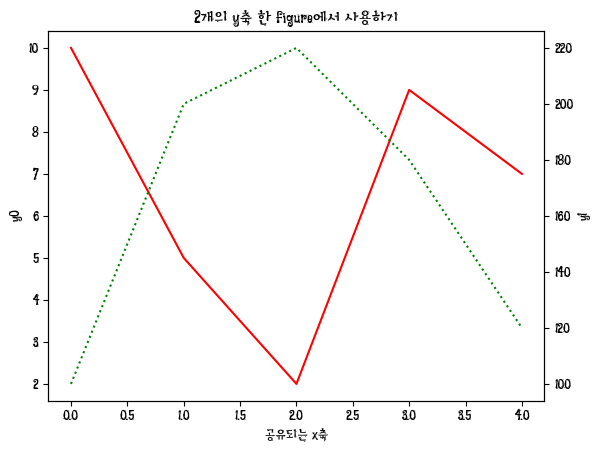

In [84]:
fig, ax0 = plt.subplots()
ax1= ax0.twinx()
ax0.set_title('2개의 y축 한 figure에서 사용하기')
ax0.plot([10, 5, 2, 9, 7], 'r-', label='y0')
ax0.set_ylabel('y0')
ax0.grid(False) # 격자점 생성
ax1.plot([100, 200, 220, 180, 120], 'g:', label = 'y1')
ax1.set_ylabel('y1')
ax1.grid(False)
ax0.set_xlabel('공유되는 x축')
plt.show()

In [85]:
# plt.bar(x,y)로 하면 차트 그래프가 생성됨.

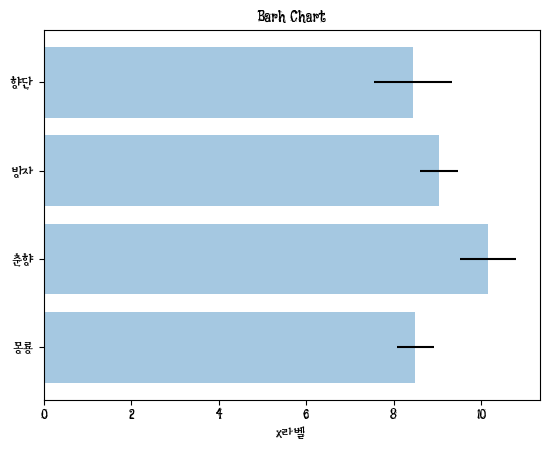

[ 8.48813504 10.15189366  9.02763376  8.44883183]


In [102]:
np.random.seed(0)
people = ['몽룡', '춘향', '방자', '향단']
performance = 3+ 10 *np.random.rand(len(people))
error = np.random.rand(len(people))  # xerr인수나 yerr인수를 지정하면 에러 바를 추가할 수 있습니다.
plt.title('Barh Chart')
plt.barh(people, performance, xerr=error, alpha = 0.4)
plt.xlabel('x라벨')
plt.show()
print(performance)

In [93]:
titanic = sns.load_dataset('titanic')
a = titanic.alive.value_counts()

2

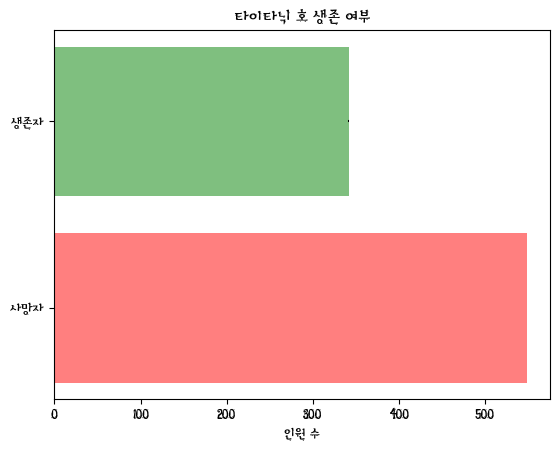

In [107]:
error = np.random.rand(len(a)) 
y = ['사망자', '생존자']
plt.title('타이타닉 호 생존 여부')
plt.barh(y,a,xerr = error, alpha=0.5 ,color = ['r','g'])
plt.xlabel('인원 수')
plt.show()

### 카테고리 별 값의 상대적인 비교를 할 때는 pie명령으로 파이 차트를 그릴 수 있습니다.

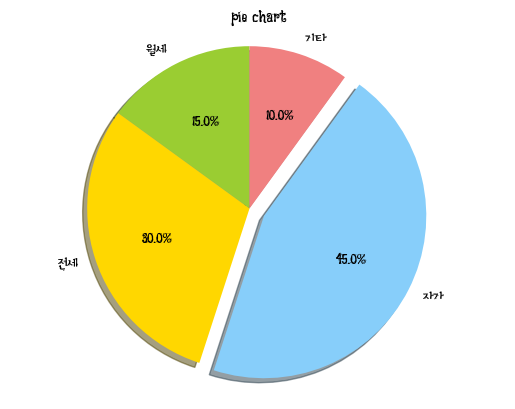

In [110]:
labels = ['월세', '전세', '자가', '기타']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1, 0) # 간격
plt.title('pie chart')
plt.pie(sizes, explode = explode , labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90) # 시작각도, 소숫점 한 자리
plt.axis('equal')
plt.show()

In [112]:
titanic.dropna(subset = ['age'], inplace=True, axis=0)
titanic

survived  pclass     sex    age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.00      1      0    7.2500        S   Third   
1           1       1  female  38.00      1      0   71.2833        C   First   
2           1       3  female  26.00      0      0    7.9250        S   Third   
3           1       1  female  35.00      1      0   53.1000        S   First   
4           0       3    male  35.00      0      0    8.0500        S   Third   
6           0       1    male  54.00      0      0   51.8625        S   First   
7           0       3    male   2.00      3      1   21.0750        S   Third   
8           1       3  female  27.00      0      2   11.1333        S   Third   
9           1       2  female  14.00      1      0   30.0708        C  Second   
10          1       3  female   4.00      1      1   16.7000        S   Third   
11          1       1  female  58.00      0      0   26.5500        S   First   
12          0       3    male  20.00      0      0    8.0500        S   Third   
13          0       3    male  39.00      1      5   31.2750        S   Third   
14          0       3  female  14.00      0      0    7.8542        S   Third   
15          1       2  female  55.00      0      0   16.0000        S  Second   
16          0       3    male   2.00      4      1   29.1250        Q   Third   
18          0       3  female  31.00      1      0   18.0000        S   Third   
20          0       2    male  35.00      0      0   26.0000        S  Second   
21          1       2    male  34.00      0      0   13.0000        S  Second   
22          1       3  female  15.00      0      0    8.0292        Q   Third   
23          1       1    male  28.00      0      0   35.5000        S   First   
24          0       3  female   8.00      3      1   21.0750        S   Third   
25          1       3  female  38.00      1      5   31.3875        S   Third   
27          0       1    male  19.00      3      2  263.0000        S   First   
30          0       1    male  40.00      0      0   27.7208        C   First   
33          0       2    male  66.00      0      0   10.5000        S  Second   
34          0       1    male  28.00      1      0   82.1708        C   First   
35          0       1    male  42.00      1      0   52.0000        S   First   
37          0       3    male  21.00      0      0    8.0500        S   Third   
38          0       3  female  18.00      2      0   18.0000        S   Third   
39          1       3  female  14.00      1      0   11.2417        C   Third   
40          0       3  female  40.00      1      0    9.4750        S   Third   
41          0       2  female  27.00      1      0   21.0000        S  Second   
43          1       2  female   3.00      1      2   41.5792        C  Second   
44          1       3  female  19.00      0      0    7.8792        Q   Third   
49          0       3  female  18.00      1      0   17.8000        S   Third   
50          0       3    male   7.00      4      1   39.6875        S   Third   
51          0       3    male  21.00      0      0    7.8000        S   Third   
52          1       1  female  49.00      1      0   76.7292        C   First   
53          1       2  female  29.00      1      0   26.0000        S  Second   
54          0       1    male  65.00      0      1   61.9792        C   First   
56          1       2  female  21.00      0      0   10.5000        S  Second   
57          0       3    male  28.50      0      0    7.2292        C   Third   
58          1       2  female   5.00      1      2   27.7500        S  Second   
59          0       3    male  11.00      5      2   46.9000        S   Third   
60          0       3    male  22.00      0      0    7.2292        C   Third   
61          1       1  female  38.00      0      0   80.0000      NaN   First   
62          0       1    male  45.00      1      0   83.4750        S   First   
63          0       3    male   4.00

장년      33.753501
청년      32.212885
미성년자    25.070028
중년       8.263305
노년       0.700280
Name: age, dtype: float64


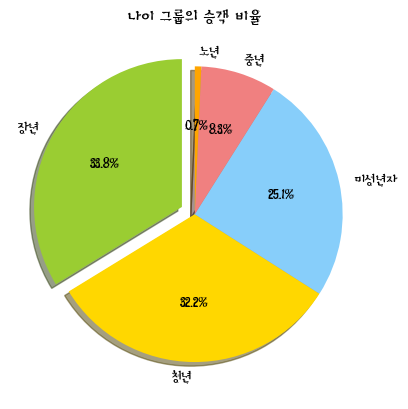

In [129]:
bins = [0, 20, 30, 50, 70, 100]
labels = ['미성년자', '청년', '장년', '중년', '노년']
values = pd.cut(titanic.age,bins=bins,labels=labels).value_counts()
values = values/np.sum(values)*100
values.sort_index()
print(values)
explode = (0.1, 0, 0, 0, 0)
label = [_ for _ in values.index]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'orange']
plt.title('나이 그룹의 승객 비율')
plt.pie(values, labels=label,explode=explode, colors = colors, autopct = "%1.1f%%",startangle = 90,shadow=True)
plt.show()

### 히스토그램: 히스토그램을 그리기 위한 hist 명령도 있습니다. hist명령은 bins인수로 데이터를 집계할 구간 정보를 받습니다. 반환값으로 데이터 집계 결과를 반환합니다. 

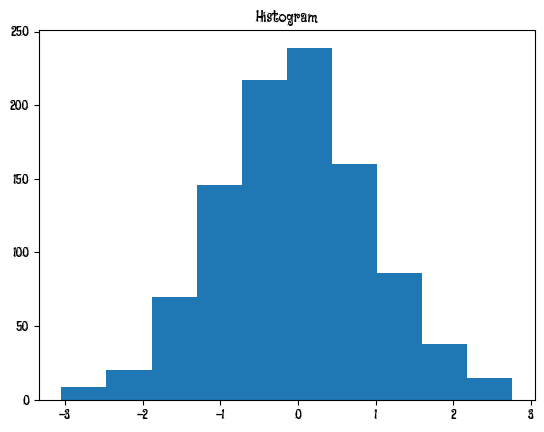

In [130]:
np.random.seed(0)
x = np.random.randn(1000)
plt.title('Histogram')
arrays, bins, patches = plt.hist(x, bins= 10)
plt.show()

### 스캐터 플롯: 2차원 데이터, 즉 두  개의 실수 데이터 집합의 상관관계를 보면 scatter명령으로 스캐터 플롯을 그립니다.

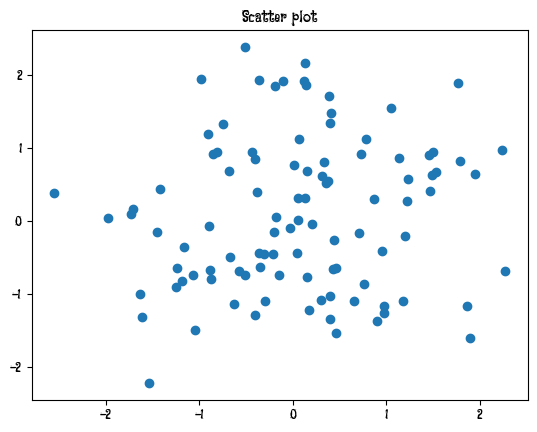

In [134]:
np.random.seed(0)
X = np.random.normal(0, 1, 100) # 정규분포에서 무작위 샘플 추출, 분포의 평균(중심), 분포의 표준편차, 분포의 크기
Y= np.random.normal(0, 1, 100)
plt.title("Scatter plot")
plt.scatter(X,Y)
plt.show()

ValueError: 'c' argument has 50 elements, which is inconsistent with 'x' and 'y' with size 30.

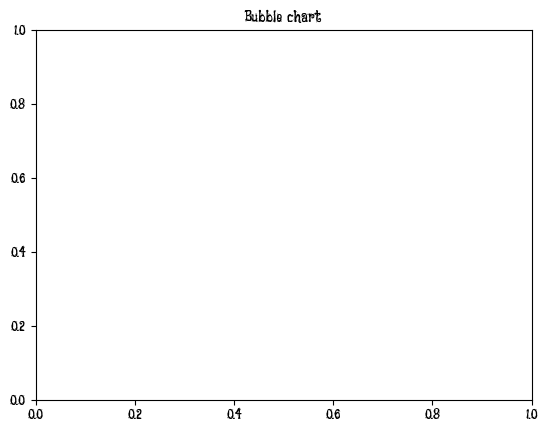

In [139]:
N=30
np.random.seed(0)
x = np.random.rand(N)
y1 = np.random.rand(N)
Y2 = np.random.rand(N) #3차원도 가능함.
y3 = np.pi * (15 * np.random.rand(N)) ** 2
plt.title('Bubble chart')
plt.scatter(x, y1, c=y2, s=y3)
plt.show()

In [140]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
X

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## imshow: 2차원 행렬 데이터를 색깔로 표시

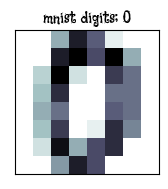

In [144]:
plt.title('mnist digits; 0')
plt.imshow(X, interpolation = 'nearest', cmap = plt.cm.bone_r) #cmap = 데이터 수치를 칼라맵이라고 합니다. 여러 속성이 있어서 가져다가 사용할 수 있다.
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplots_adjust(left = 0.35, right = 0.65, bottom = 0.35, top = 0.65)
plt.show()

In [145]:
dir(plt.cm)[:15]

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'ColormapRegistry',
 'Dark2',
 'Dark2_r']

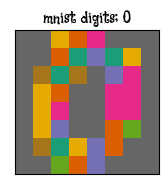

In [146]:
plt.title('mnist digits; 0')
plt.imshow(X, interpolation = 'nearest', cmap = plt.cm.Dark2_r) #cmap = 데이터 수치를 칼라맵이라고 합니다. 여러 속성이 있어서 가져다가 사용할 수 있다.
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplots_adjust(left = 0.35, right = 0.65, bottom = 0.35, top = 0.65)
plt.show()

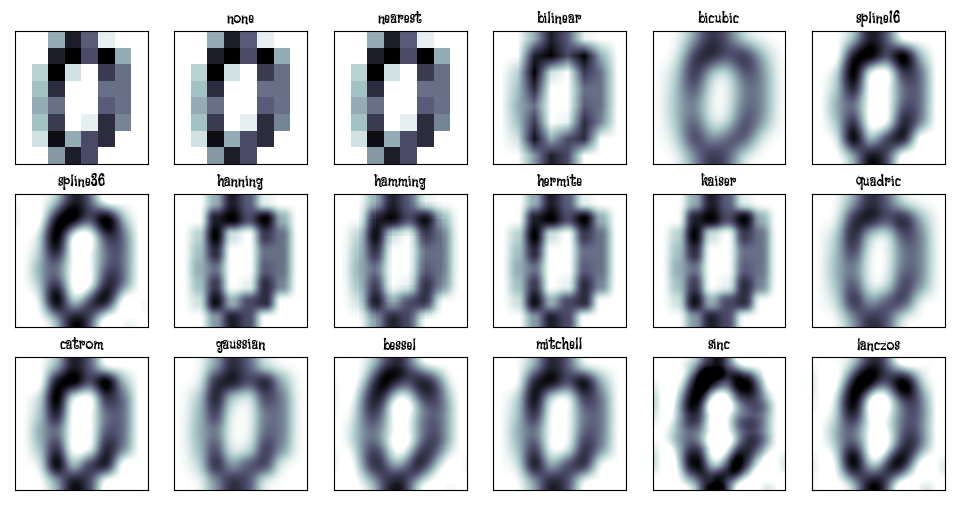

In [147]:
methods = [
    None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
    'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
    'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
]
fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(X, cmap=plt.cm.bone_r, interpolation=interp_method)
    ax.set_title(interp_method)
plt.show()

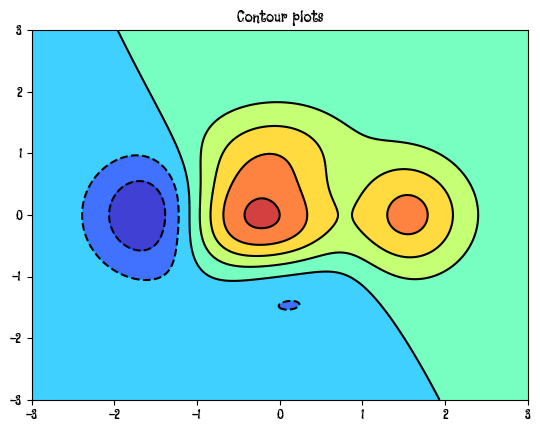

In [148]:
def f(x,y):
    return (1-x/2+x**5 + y**3)*np.exp(-x**2 - y**2)
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
XX, YY = np.meshgrid(x,y)
zz = f(XX,YY)
plt.title('Contour plots')
plt.contourf(XX, YY, zz, alpha = 0.75, cmap = 'jet')
plt.contour(XX, YY, zz, colors = 'black')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_14344\2504982856.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


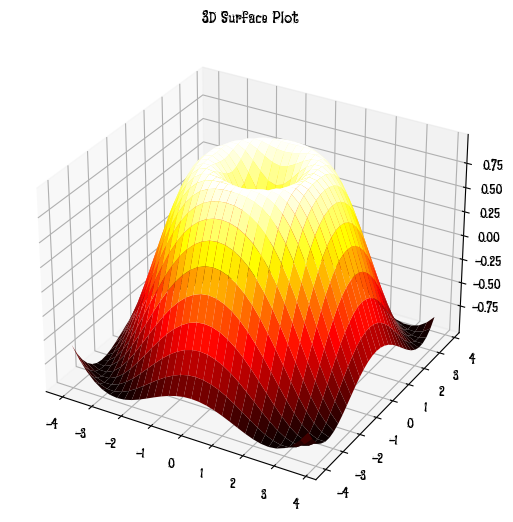

In [149]:
# 3차원 서비스 플롯 Axes3D라는 전용 Axes를 생성하여 입체적으로 표현합니다.
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
XX, YY = np.meshgrid(X, Y)
RR = np.sqrt(XX**2 + YY**2)
ZZ = np.sin(RR)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('3D Surface Plot')
ax.plot_surface(XX, YY, ZZ, rstride = 1, cstride = 1 , cmap='hot')
plt.show()

In [152]:
print('\'''\'')

''


In [153]:
titanic

survived  pclass     sex    age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.00      1      0    7.2500        S   Third   
1           1       1  female  38.00      1      0   71.2833        C   First   
2           1       3  female  26.00      0      0    7.9250        S   Third   
3           1       1  female  35.00      1      0   53.1000        S   First   
4           0       3    male  35.00      0      0    8.0500        S   Third   
6           0       1    male  54.00      0      0   51.8625        S   First   
7           0       3    male   2.00      3      1   21.0750        S   Third   
8           1       3  female  27.00      0      2   11.1333        S   Third   
9           1       2  female  14.00      1      0   30.0708        C  Second   
10          1       3  female   4.00      1      1   16.7000        S   Third   
11          1       1  female  58.00      0      0   26.5500        S   First   
12          0       3    male  20.00      0      0    8.0500        S   Third   
13          0       3    male  39.00      1      5   31.2750        S   Third   
14          0       3  female  14.00      0      0    7.8542        S   Third   
15          1       2  female  55.00      0      0   16.0000        S  Second   
16          0       3    male   2.00      4      1   29.1250        Q   Third   
18          0       3  female  31.00      1      0   18.0000        S   Third   
20          0       2    male  35.00      0      0   26.0000        S  Second   
21          1       2    male  34.00      0      0   13.0000        S  Second   
22          1       3  female  15.00      0      0    8.0292        Q   Third   
23          1       1    male  28.00      0      0   35.5000        S   First   
24          0       3  female   8.00      3      1   21.0750        S   Third   
25          1       3  female  38.00      1      5   31.3875        S   Third   
27          0       1    male  19.00      3      2  263.0000        S   First   
30          0       1    male  40.00      0      0   27.7208        C   First   
33          0       2    male  66.00      0      0   10.5000        S  Second   
34          0       1    male  28.00      1      0   82.1708        C   First   
35          0       1    male  42.00      1      0   52.0000        S   First   
37          0       3    male  21.00      0      0    8.0500        S   Third   
38          0       3  female  18.00      2      0   18.0000        S   Third   
39          1       3  female  14.00      1      0   11.2417        C   Third   
40          0       3  female  40.00      1      0    9.4750        S   Third   
41          0       2  female  27.00      1      0   21.0000        S  Second   
43          1       2  female   3.00      1      2   41.5792        C  Second   
44          1       3  female  19.00      0      0    7.8792        Q   Third   
49          0       3  female  18.00      1      0   17.8000        S   Third   
50          0       3    male   7.00      4      1   39.6875        S   Third   
51          0       3    male  21.00      0      0    7.8000        S   Third   
52          1       1  female  49.00      1      0   76.7292        C   First   
53          1       2  female  29.00      1      0   26.0000        S  Second   
54          0       1    male  65.00      0      1   61.9792        C   First   
56          1       2  female  21.00      0      0   10.5000        S  Second   
57          0       3    male  28.50      0      0    7.2292        C   Third   
58          1       2  female   5.00      1      2   27.7500        S  Second   
59          0       3    male  11.00      5      2   46.9000        S   Third   
60          0       3    male  22.00      0      0    7.2292        C   Third   
61          1       1  female  38.00      0      0   80.0000      NaN   First   
62          0       1    male  45.00      1      0   83.4750        S   First   
63          0       3    male   4.00

In [162]:
titanic_age = titanic.to_csv('C:/python/titanic_age.csv',index=False # reset_index가 아니라 index=False

In [163]:
titanic_age = pd.read_csv('C:/python/titanic_age.csv')
titanic_age

survived  pclass     sex    age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.00      1      0    7.2500        S   Third   
1           1       1  female  38.00      1      0   71.2833        C   First   
2           1       3  female  26.00      0      0    7.9250        S   Third   
3           1       1  female  35.00      1      0   53.1000        S   First   
4           0       3    male  35.00      0      0    8.0500        S   Third   
5           0       1    male  54.00      0      0   51.8625        S   First   
6           0       3    male   2.00      3      1   21.0750        S   Third   
7           1       3  female  27.00      0      2   11.1333        S   Third   
8           1       2  female  14.00      1      0   30.0708        C  Second   
9           1       3  female   4.00      1      1   16.7000        S   Third   
10          1       1  female  58.00      0      0   26.5500        S   First   
11          0       3    male  20.00      0      0    8.0500        S   Third   
12          0       3    male  39.00      1      5   31.2750        S   Third   
13          0       3  female  14.00      0      0    7.8542        S   Third   
14          1       2  female  55.00      0      0   16.0000        S  Second   
15          0       3    male   2.00      4      1   29.1250        Q   Third   
16          0       3  female  31.00      1      0   18.0000        S   Third   
17          0       2    male  35.00      0      0   26.0000        S  Second   
18          1       2    male  34.00      0      0   13.0000        S  Second   
19          1       3  female  15.00      0      0    8.0292        Q   Third   
20          1       1    male  28.00      0      0   35.5000        S   First   
21          0       3  female   8.00      3      1   21.0750        S   Third   
22          1       3  female  38.00      1      5   31.3875        S   Third   
23          0       1    male  19.00      3      2  263.0000        S   First   
24          0       1    male  40.00      0      0   27.7208        C   First   
25          0       2    male  66.00      0      0   10.5000        S  Second   
26          0       1    male  28.00      1      0   82.1708        C   First   
27          0       1    male  42.00      1      0   52.0000        S   First   
28          0       3    male  21.00      0      0    8.0500        S   Third   
29          0       3  female  18.00      2      0   18.0000        S   Third   
30          1       3  female  14.00      1      0   11.2417        C   Third   
31          0       3  female  40.00      1      0    9.4750        S   Third   
32          0       2  female  27.00      1      0   21.0000        S  Second   
33          1       2  female   3.00      1      2   41.5792        C  Second   
34          1       3  female  19.00      0      0    7.8792        Q   Third   
35          0       3  female  18.00      1      0   17.8000        S   Third   
36          0       3    male   7.00      4      1   39.6875        S   Third   
37          0       3    male  21.00      0      0    7.8000        S   Third   
38          1       1  female  49.00      1      0   76.7292        C   First   
39          1       2  female  29.00      1      0   26.0000        S  Second   
40          0       1    male  65.00      0      1   61.9792        C   First   
41          1       2  female  21.00      0      0   10.5000        S  Second   
42          0       3    male  28.50      0      0    7.2292        C   Third   
43          1       2  female   5.00      1      2   27.7500        S  Second   
44          0       3    male  11.00      5      2   46.9000        S   Third   
45          0       3    male  22.00      0      0    7.2292        C   Third   
46          1       1  female  38.00      0      0   80.0000      NaN   First   
47          0       1    male  45.00      1      0   83.4750        S   First   
48          0       3    male   4.00

In [164]:
titanic = sns.load_dataset('titanic')
titanic

survived  pclass     sex    age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.00      1      0    7.2500        S   Third   
1           1       1  female  38.00      1      0   71.2833        C   First   
2           1       3  female  26.00      0      0    7.9250        S   Third   
3           1       1  female  35.00      1      0   53.1000        S   First   
4           0       3    male  35.00      0      0    8.0500        S   Third   
5           0       3    male    NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.00      0      0   51.8625        S   First   
7           0       3    male   2.00      3      1   21.0750        S   Third   
8           1       3  female  27.00      0      2   11.1333        S   Third   
9           1       2  female  14.00      1      0   30.0708        C  Second   
10          1       3  female   4.00      1      1   16.7000        S   Third   
11          1       1  female  58.00      0      0   26.5500        S   First   
12          0       3    male  20.00      0      0    8.0500        S   Third   
13          0       3    male  39.00      1      5   31.2750        S   Third   
14          0       3  female  14.00      0      0    7.8542        S   Third   
15          1       2  female  55.00      0      0   16.0000        S  Second   
16          0       3    male   2.00      4      1   29.1250        Q   Third   
17          1       2    male    NaN      0      0   13.0000        S  Second   
18          0       3  female  31.00      1      0   18.0000        S   Third   
19          1       3  female    NaN      0      0    7.2250        C   Third   
20          0       2    male  35.00      0      0   26.0000        S  Second   
21          1       2    male  34.00      0      0   13.0000        S  Second   
22          1       3  female  15.00      0      0    8.0292        Q   Third   
23          1       1    male  28.00      0      0   35.5000        S   First   
24          0       3  female   8.00      3      1   21.0750        S   Third   
25          1       3  female  38.00      1      5   31.3875        S   Third   
26          0       3    male    NaN      0      0    7.2250        C   Third   
27          0       1    male  19.00      3      2  263.0000        S   First   
28          1       3  female    NaN      0      0    7.8792        Q   Third   
29          0       3    male    NaN      0      0    7.8958        S   Third   
30          0       1    male  40.00      0      0   27.7208        C   First   
31          1       1  female    NaN      1      0  146.5208        C   First   
32          1       3  female    NaN      0      0    7.7500        Q   Third   
33          0       2    male  66.00      0      0   10.5000        S  Second   
34          0       1    male  28.00      1      0   82.1708        C   First   
35          0       1    male  42.00      1      0   52.0000        S   First   
36          1       3    male    NaN      0      0    7.2292        C   Third   
37          0       3    male  21.00      0      0    8.0500        S   Third   
38          0       3  female  18.00      2      0   18.0000        S   Third   
39          1       3  female  14.00      1      0   11.2417        C   Third   
40          0       3  female  40.00      1      0    9.4750        S   Third   
41          0       2  female  27.00      1      0   21.0000        S  Second   
42          0       3    male    NaN      0      0    7.8958        C   Third   
43          1       2  female   3.00      1      2   41.5792        C  Second   
44          1       3  female  19.00      0      0    7.8792        Q   Third   
45          0       3    male    NaN      0      0    8.0500        S   Third   
46          0       3    male    NaN      1      0   15.5000        Q   Third   
47          1       3  female    NaN      0      0    7.7500        Q   Third   
48          0       3    male    NaN

In [232]:
titanic[['pclass','survived']].groupby('pclass').mean() # pclass와 survived를 그룹바이해서 pclass index기준으로 mean을 도출함

survived
pclass          
1       0.629630
2       0.472826
3       0.242363

In [255]:
groups = titanic.groupby('pclass')
groups[['survived','age']].mean()

survived        age
pclass                     
1       0.629630  38.233441
2       0.472826  29.877630
3       0.242363  25.140620

In [254]:
groups['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [257]:
group = titanic.groupby('sex')
group[['age']].mean()

age
sex              
female  27.915709
male    30.726645

In [268]:
group.get_group('female')

survived  pclass     sex    age  sibsp  parch      fare embarked   class  \
1           1       1  female  38.00      1      0   71.2833        C   First   
2           1       3  female  26.00      0      0    7.9250        S   Third   
3           1       1  female  35.00      1      0   53.1000        S   First   
8           1       3  female  27.00      0      2   11.1333        S   Third   
9           1       2  female  14.00      1      0   30.0708        C  Second   
10          1       3  female   4.00      1      1   16.7000        S   Third   
11          1       1  female  58.00      0      0   26.5500        S   First   
14          0       3  female  14.00      0      0    7.8542        S   Third   
15          1       2  female  55.00      0      0   16.0000        S  Second   
18          0       3  female  31.00      1      0   18.0000        S   Third   
19          1       3  female    NaN      0      0    7.2250        C   Third   
22          1       3  female  15.00      0      0    8.0292        Q   Third   
24          0       3  female   8.00      3      1   21.0750        S   Third   
25          1       3  female  38.00      1      5   31.3875        S   Third   
28          1       3  female    NaN      0      0    7.8792        Q   Third   
31          1       1  female    NaN      1      0  146.5208        C   First   
32          1       3  female    NaN      0      0    7.7500        Q   Third   
38          0       3  female  18.00      2      0   18.0000        S   Third   
39          1       3  female  14.00      1      0   11.2417        C   Third   
40          0       3  female  40.00      1      0    9.4750        S   Third   
41          0       2  female  27.00      1      0   21.0000        S  Second   
43          1       2  female   3.00      1      2   41.5792        C  Second   
44          1       3  female  19.00      0      0    7.8792        Q   Third   
47          1       3  female    NaN      0      0    7.7500        Q   Third   
49          0       3  female  18.00      1      0   17.8000        S   Third   
52          1       1  female  49.00      1      0   76.7292        C   First   
53          1       2  female  29.00      1      0   26.0000        S  Second   
56          1       2  female  21.00      0      0   10.5000        S  Second   
58          1       2  female   5.00      1      2   27.7500        S  Second   
61          1       1  female  38.00      0      0   80.0000      NaN   First   
66          1       2  female  29.00      0      0   10.5000        S  Second   
68          1       3  female  17.00      4      2    7.9250        S   Third   
71          0       3  female  16.00      5      2   46.9000        S   Third   
79          1       3  female  30.00      0      0   12.4750        S   Third   
82          1       3  female    NaN      0      0    7.7875        Q   Third   
84          1       2  female  17.00      0      0   10.5000        S  Second   
85          1       3  female  33.00      3      0   15.8500        S   Third   
88          1       1  female  23.00      3      2  263.0000        S   First   
98          1       2  female  34.00      0      1   23.0000        S  Second   
100         0       3  female  28.00      0      0    7.8958        S   Third   
106         1       3  female  21.00      0      0    7.6500        S   Third   
109         1       3  female    NaN      1      0   24.1500        Q   Third   
111         0       3  female  14.50      1      0   14.4542        C   Third   
113         0       3  female  20.00      1      0    9.8250        S   Third   
114         0       3  female  17.00      0      0   14.4583        C   Third   
119         0       3  female   2.00      4      2   31.2750        S   Third   
123         1       2  female  32.50      0      0   13.0000        S  Second   
128         1       3  female    NaN      1      1   22.3583        C   Third   
132         0       3  female  47.00

## Seaborn이란 matplotlib을 기반으로 한 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 패키지입니다. 통계 기능은 Statsmodels패키지에 의존합니다.
### seaborn.countplot(data, x, y, hue....) 각 카테고리 값마다 데이터가 얼마나 있는지 표시할 수 있습니다. (막대그래프로) hue: 분류할 두번째 변수를 설정할 수도 있습니다.
### seaborn.set_theme(style, palette)는 글로벌 범위의 테마를 적용해서 그래프를 꾸밀 수 있습니다. 참고: set_context()의 인수로 paper,notebook 등으로 세팅할 수도 있습니다.
### 

<AxesSubplot:xlabel='class', ylabel='count'>

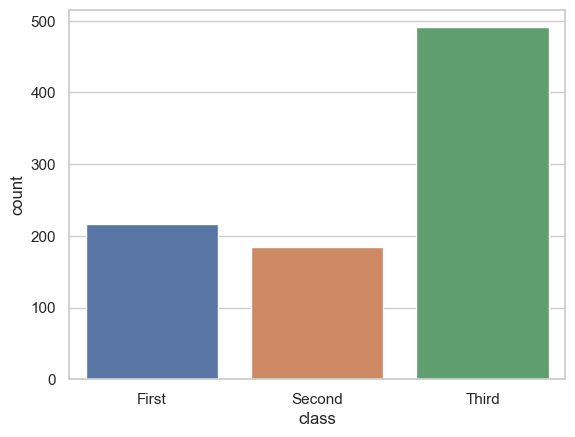

In [279]:
df = sns.load_dataset('titanic')
sns.set_theme(style = "whitegrid")
sns.countplot(x = df['class']) # x 키워드에 Series로 전달하고 있습니다. 유니크하게 가져와서 카운트를 합니다.

<AxesSubplot:xlabel='class', ylabel='count'>

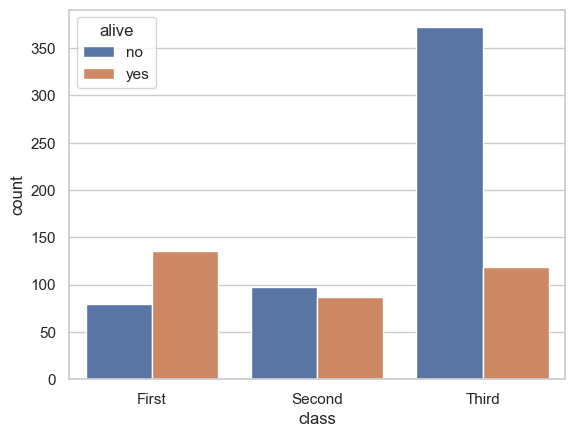

In [280]:
sns.countplot(data=df, x='class', hue ='alive')

<AxesSubplot:xlabel='count', ylabel='deck'>

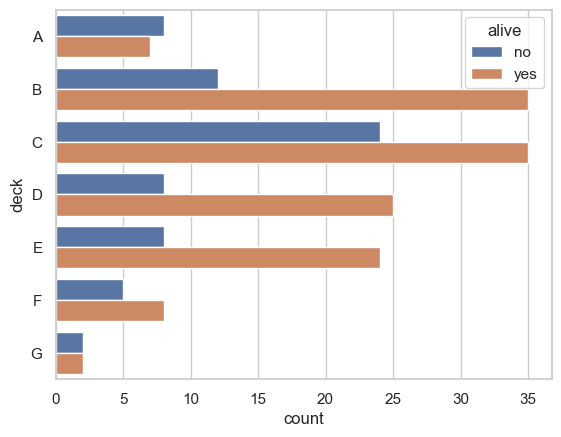

In [281]:
# 수평하게 작성하기
sns.countplot(data=df, y='deck', hue = 'alive')

## tips 데이터세트/ total_bill-총지불금액, tip-팁, sex, smoker, day, time-식사시간대, size-식사 인원

In [283]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### rugplot(): 러그플롯은 데이터 위치를 x축 위에 작은 선분(rug)로 나타내어 실제 데이터들의 위치를 보여줍니다.

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

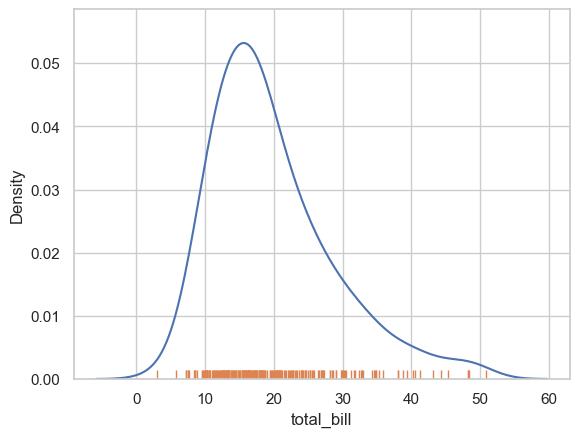

In [284]:
sns.kdeplot(data=tips, x='total_bill') # 히스토그램보다 부드러운 분포 곡선을 그려줍니다.
sns.rugplot(data=tips, x='total_bill')

In [285]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

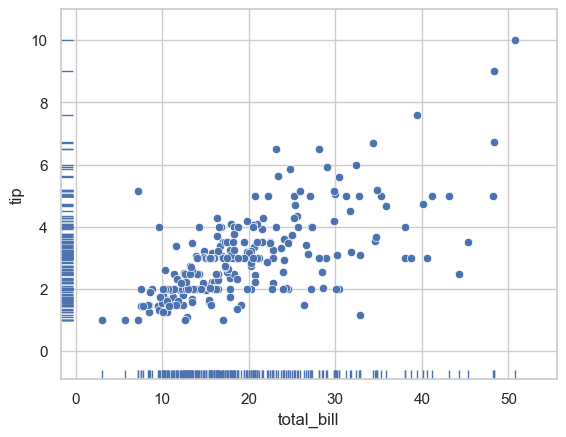

In [286]:
sns.scatterplot(data=tips, x='total_bill', y='tip')
sns.rugplot(data=tips, x='total_bill', y='tip')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

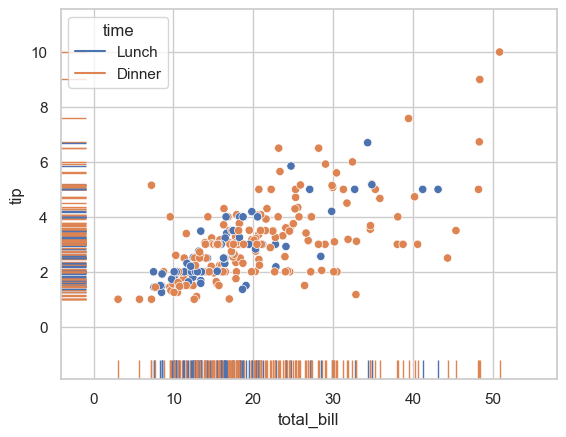

In [290]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')
sns.rugplot(data=tips, x='total_bill', y='tip', hue = 'time', height = .05) #height 크기

<AxesSubplot:xlabel='carat', ylabel='price'>

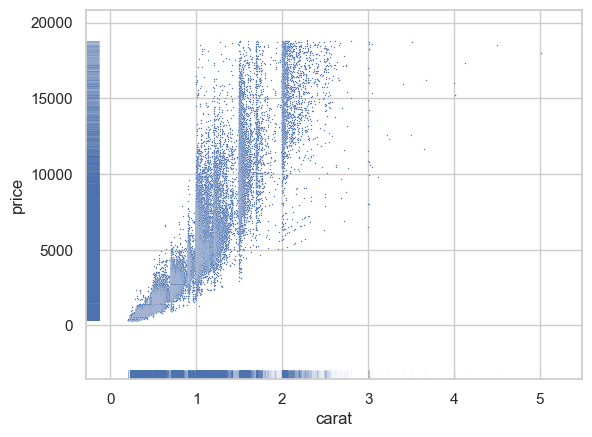

In [298]:
diamonds = sns.load_dataset('diamonds')
sns.scatterplot(data=diamonds, x='carat', y='price', s=1) # s = 점의 크기
sns.rugplot(data=diamonds, x='carat', y='price', lw=0.5, alpha=0.05) #alpha = 투명정도, lw= 굵기

### histplot(): 히스토그램으로 보여줍니다.

In [309]:
penguins = sns.load_dataset('penguins')
'''
species: 펭귄의 종(Chinstrap, Adélie, Gentoo)
culmen_length_mm: culmen length (mm) 부리
culmen_depth_mm: culmen depth (mm) 부리의 위아래 길이
flipper_length_mm: flipper length (mm) 팔 길이
body_mass_g: 체중(g)
island: 서식지 섬 (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
sex: 펭귄 성별
'''
penguins.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

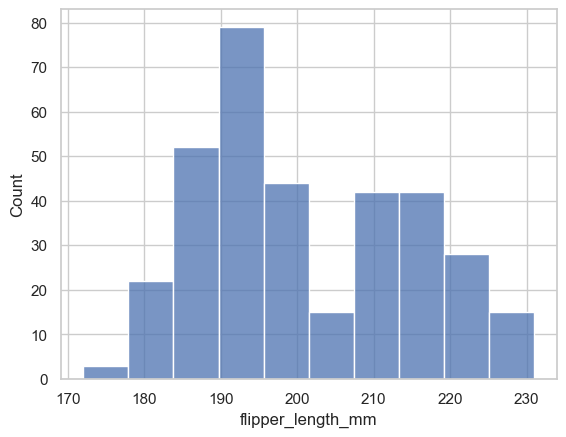

In [310]:
sns.histplot(data=penguins, x='flipper_length_mm')

<AxesSubplot:xlabel='Count', ylabel='flipper_length_mm'>

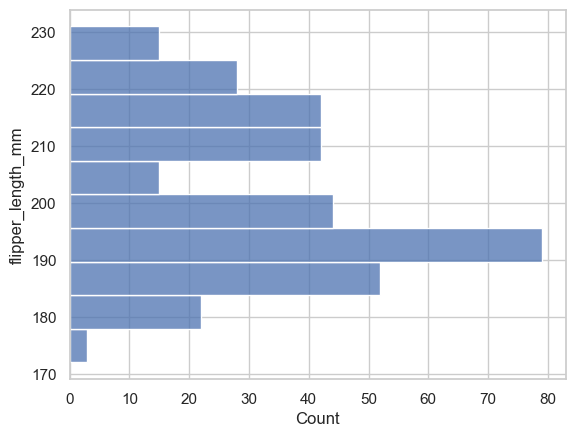

In [311]:
# 수평으로 만들기
sns.histplot(data=penguins, y='flipper_length_mm')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

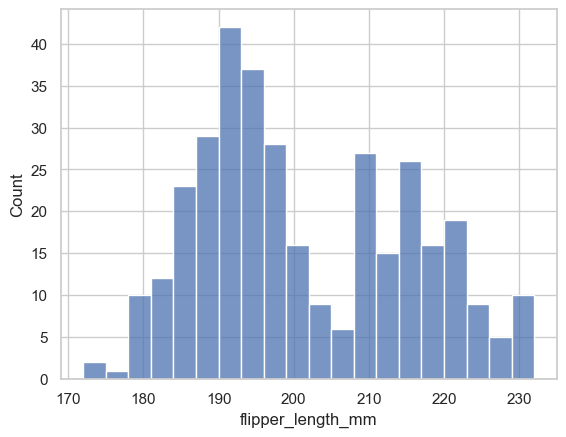

In [315]:
# bin 너비 지정하기
sns.histplot(data=penguins, x='flipper_length_mm', binwidth=3)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

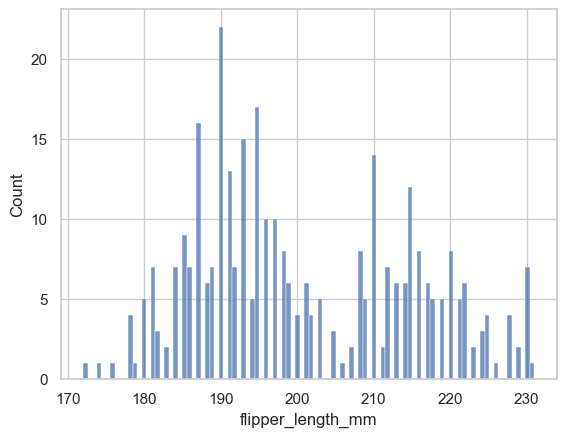

In [321]:
# bins = 막대 개수
sns.histplot(data=penguins, x='flipper_length_mm', bins=100) # 막대 백개

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

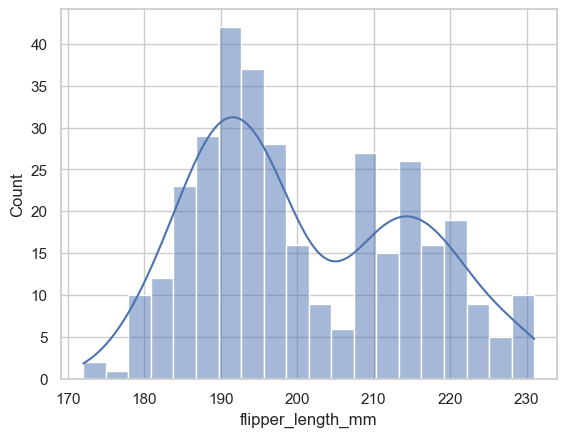

In [325]:
# histplot() kde를 동시에 표현하기
# bin 너비 지정하기
sns.histplot(data=penguins, x='flipper_length_mm',bins=20,kde=True)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

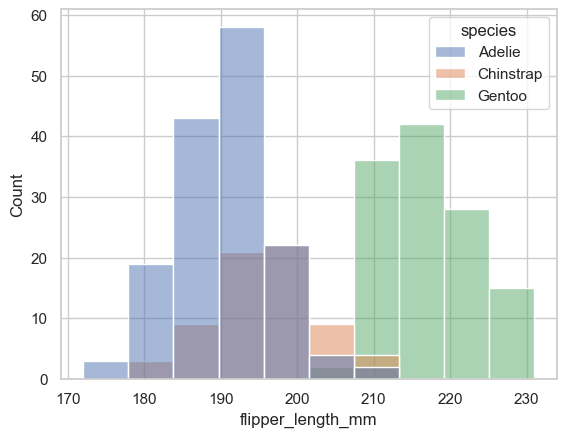

In [326]:
# bin 너비 지정하기
sns.histplot(data=penguins, x='flipper_length_mm', hue = 'species')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

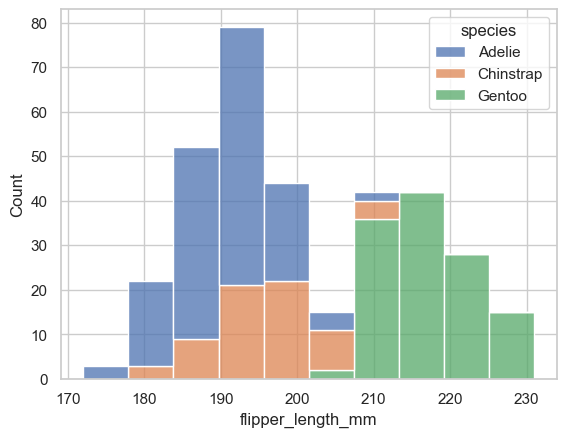

In [328]:
# stack: 누적하여 표현하기
sns.histplot(data=penguins, x='flipper_length_mm', hue = 'species', multiple = 'stack')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

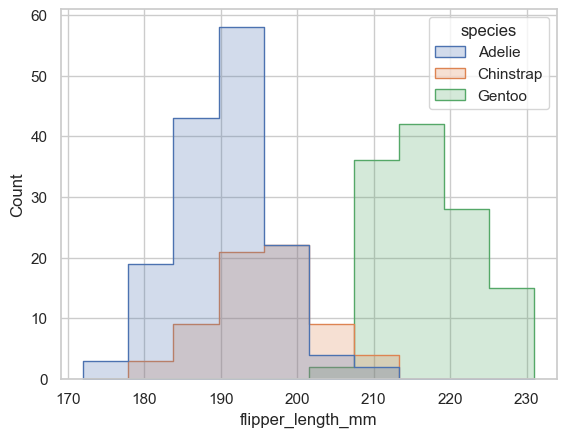

In [329]:
# step
sns.histplot(data=penguins, x='flipper_length_mm', hue = 'species', element='step')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

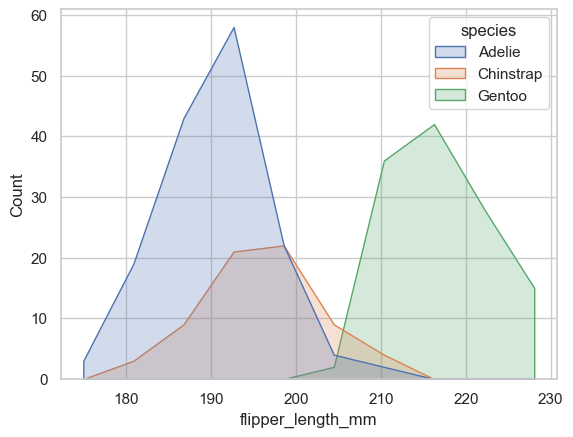

In [330]:
# poly
sns.histplot(data=penguins, x='flipper_length_mm', hue = 'species', element = 'poly')

<AxesSubplot:xlabel='bill_depth_mm', ylabel='body_mass_g'>

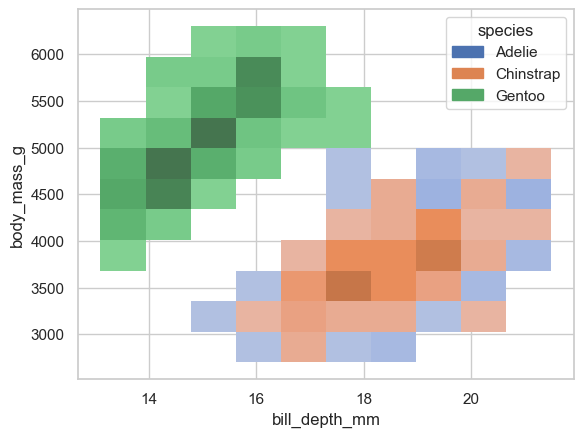

In [332]:
# x와 y축 둘 다 할당하면 히트맵 형태의 히스토그램으로 표현할 수 있습니다.
sns.histplot(data=penguins, x='bill_depth_mm', y = 'body_mass_g',hue = 'species')

<AxesSubplot:xlabel='bill_depth_mm', ylabel='species'>

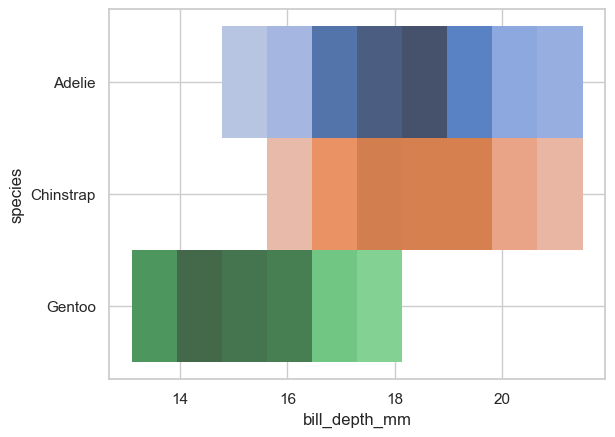

In [335]:
# 이산된 값이라면 아래와 같이 쉽게 표현할 수 있습니다
sns.histplot(data=penguins, x='bill_depth_mm', y = 'species',hue = 'species',legend=False)

### displot(): ㅎ ㅣ스토그램과 같지만 rug와 kde에 동시에 표현이 가능해서 더 많이 사용됩니다.

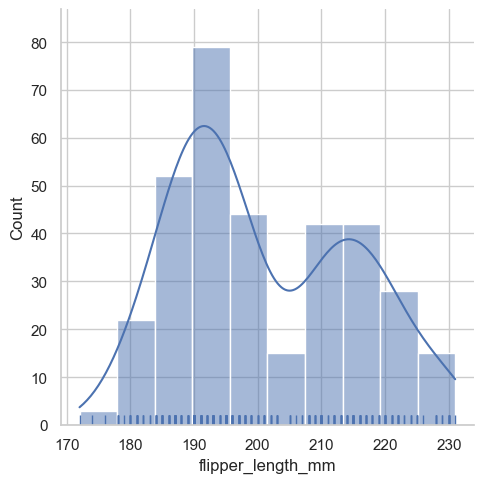

In [345]:
sns.displot(penguins,x='flipper_length_mm',rug=True,kde=True)

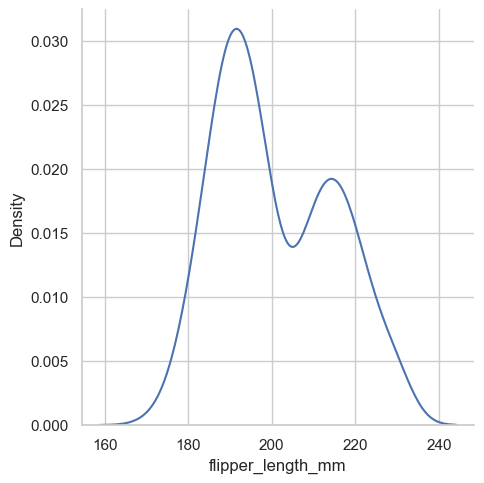

In [346]:
#종류변경하기
sns.displot(penguins,x='flipper_length_mm',kind='kde')

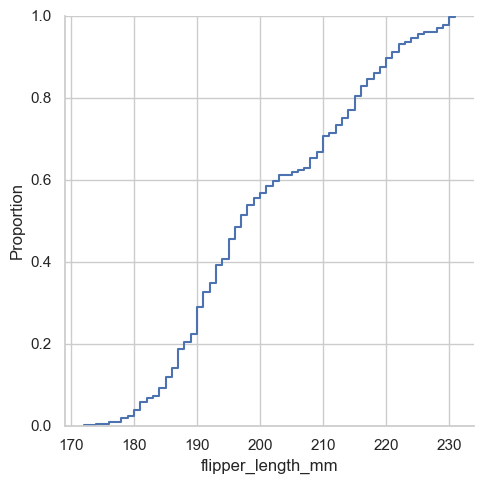

In [347]:
# 누적분포그래프
sns.displot(penguins,x='flipper_length_mm',kind='ecdf')

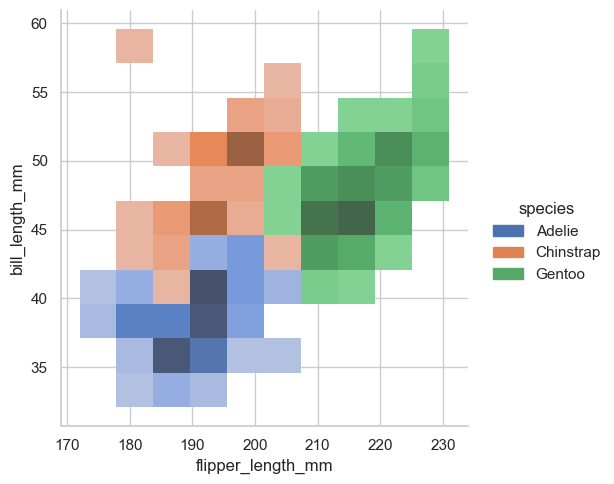

In [348]:
# 동시에 히트맵형태로 표현
sns.displot(penguins,x='flipper_length_mm',y='bill_length_mm',hue='species')

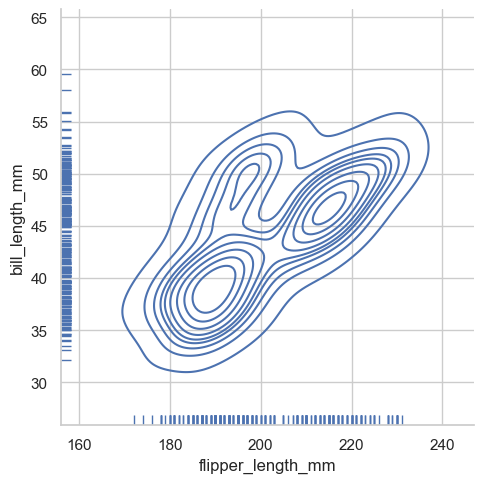

In [349]:
# displot() 2개 값을 kde로 표현하기
g=sns.displot(penguins,x='flipper_length_mm',y='bill_length_mm',rug=True,kind='kde') # marginal (가장자리의)